<a href="https://colab.research.google.com/github/sharsh09/-_-/blob/main/Task3_CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Loading Data
df = pd.read_csv("/content/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.size

5330

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# No null data is present
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.duplicated().sum() # No duplicate values

0

In [9]:
# Total no of models
df["CarName"].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

Separating Features and Target 

In [10]:
data = df[["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]
x = data.drop(columns="price")           
y = data["price"]

Model training
1. Spliting the data into training and testing dataset.

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, test_size = 0.1)

In [12]:
print(x_train.shape) 
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(41, 13)
(21, 13)
(41,)
(21,)


2. Linear Regression

In [13]:
# Loading the Regressor Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
#Fitting the model
model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [19]:
# Prediction on Training Data
y_pred = model.predict(x_train)
y_pred #PREDCITED VALUES

array([ 6061.36255048, 10874.00698072, 31808.91813535, 11642.61538783,
        9820.92716753,  8820.55689295,  9355.94553274, 18716.58569621,
       21847.4782115 ,  7674.58198381,  8788.40487051, 26330.54336483,
        8079.85659314,  7905.0313522 , 28717.86898216, 24817.1849205 ,
        7296.95550919,  9145.69799554,  9883.5074791 ,  9868.23516775,
       11571.25271433, 12281.42172116, 42290.58719584,  8685.69366739,
       20029.17666504,  6320.95361652,  9715.11114829,   -76.19206669,
       15269.16392644,  8093.34597743,  7302.30586496, 19033.99681179,
       10272.18691205,  8688.13518573, 13479.21200687, 19713.3666997 ,
       16069.65912626,  8833.09302229,  7947.6027584 , 19798.53711578,
       15358.12515636])

In [20]:
y_train #ACTUAL VALUES

27      8558.0
11     16925.0
129    31400.5
168     9639.0
62     10245.0
144     9233.0
165     9298.0
102    14399.0
106    18399.0
35      7295.0
142     7775.0
69     28176.0
138     5118.0
45      8916.5
17     36880.0
202    21485.0
24      6229.0
81      8499.0
131     9895.0
1      16500.0
82     12629.0
192    13845.0
74     45400.0
186     8495.0
178    16558.0
98      8249.0
42     10345.0
18      5151.0
197    16515.0
31      6855.0
26      7609.0
103    13499.0
141     7126.0
76      5389.0
109    12440.0
116    17950.0
117    18150.0
34      7129.0
36      7295.0
105    19699.0
194    12940.0
Name: price, dtype: float64

In [21]:
# ACCURACY
from sklearn.metrics import r2_score
r_sqaured = r2_score(y_train,y_pred)
r_sqaured

0.8868385574058619

In [22]:
# Prediction on Testing Data
y_pred = model.predict(x_test)
y_pred #PREDCITED VALUES

array([ 5672.70830061,  8039.89458699, 12170.61768511,  6755.43038298,
        8039.89458699,  8724.67021689, 13951.46710497, 13797.18581245,
        9024.67678871,  5943.89660808,  8670.37219404, 31314.98899734,
       13810.56170188,  7645.61798977,  6068.05086875,  7808.41677261,
       13590.53260186, 15260.4912152 ,  9824.57513737,  8969.06448794,
       17920.19542728])

In [23]:
y_test #ACTUAL VALUES

94      7299.0
88      9279.0
159     7788.0
139     7053.0
87      9279.0
130     9295.0
191    13295.0
12     20970.0
86      8189.0
51      6095.0
185     8195.0
72     35056.0
13     21105.0
149    11694.0
150     5348.0
189    11595.0
115    16630.0
195    13415.0
64     11245.0
177    11248.0
113    16695.0
Name: price, dtype: float64

In [24]:
# ACCURACY
from sklearn.metrics import r2_score
r_sqaured = r2_score(y_test,y_pred)
r_sqaured

0.7881285148049546

DATA VISUALIZATION

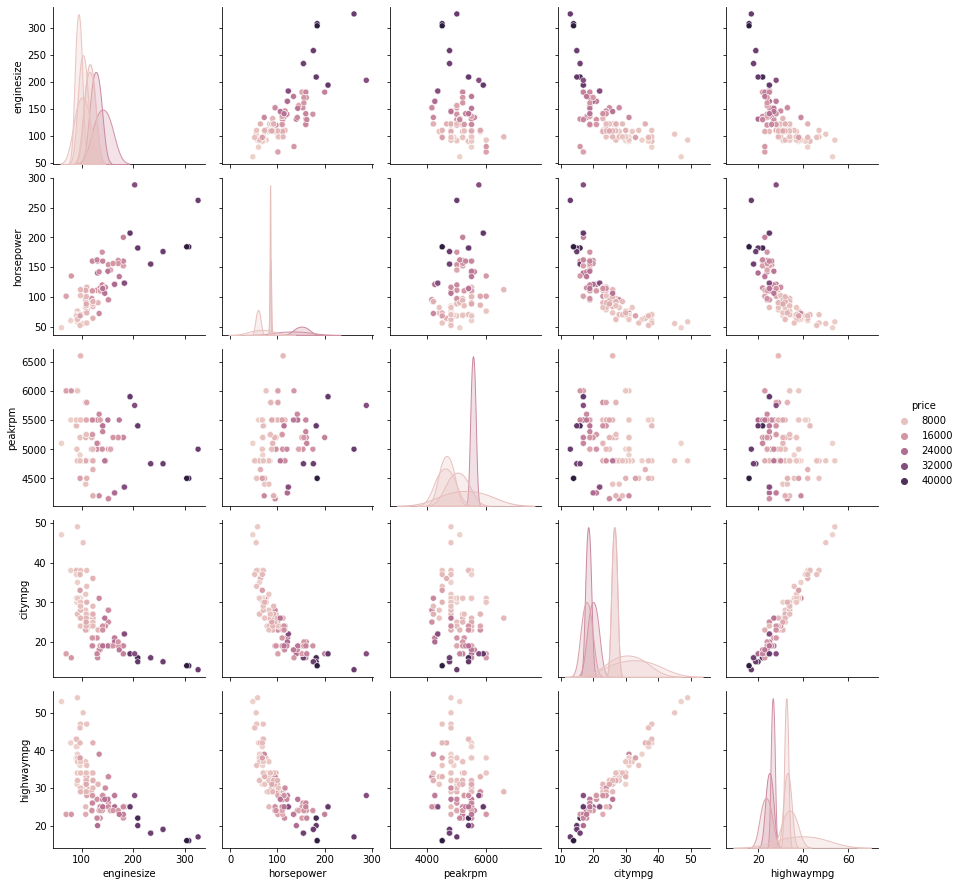

In [25]:
new_data = df[["CarName","fueltype","aspiration","enginetype","enginesize","fuelsystem","horsepower","peakrpm","citympg","highwaympg","price"]]
sns.pairplot(new_data, hue="price")

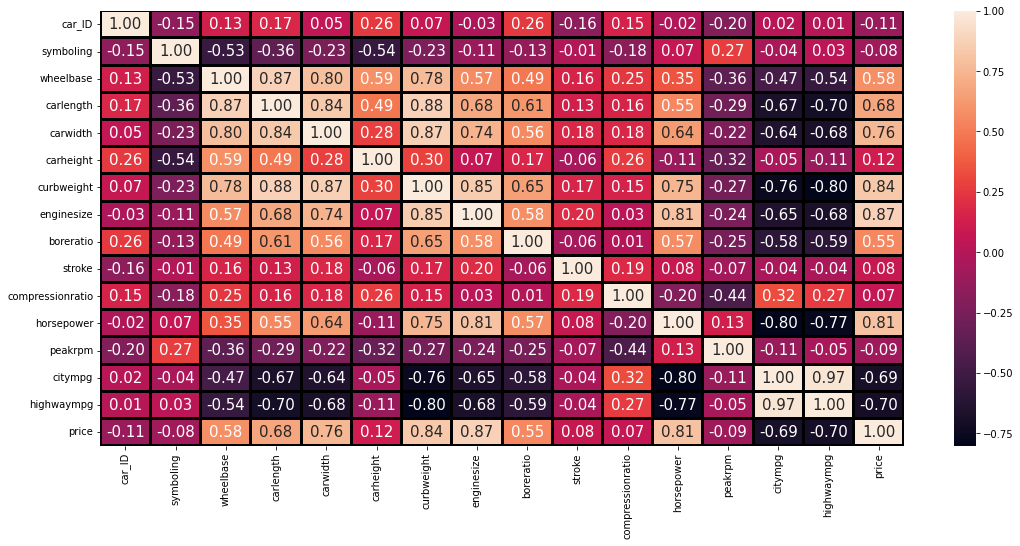

In [26]:
# Correlation between the features of the dataset 
plt.figure(figsize = (18, 8))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'black')
plt.show()

# Correlation of numerical variables

1. Wheelbase have positive correlation with price of 58%.
2. Car length and Car width have positive correlation with price of 68% and 76%.
3. Curbweight have positive correlation with price of 84%.
4. Enginesize have positive correlation with price of 87%.
5. Boreratio have positive correlation with price of 55%.
6. Horsepower have positive correlation with price of 81%.
7. Citympg and Highwaympg have negative correlation with price of 69% and 70%

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


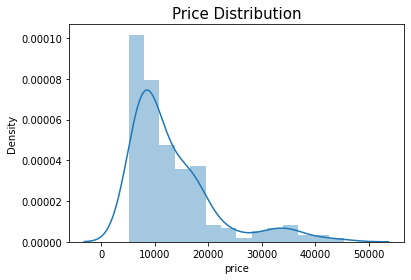

In [27]:
# Price Distribution throughout the dataset
plt.title("Price Distribution", fontsize=15)
sns.distplot(df["price"])
plt.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

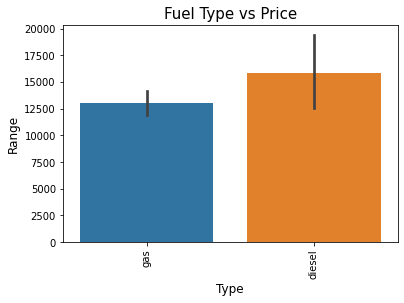

In [28]:
# Graph w.r.t Fuel Type and price
sns.barplot(data = df, x=df['fueltype'],y=df['price'])
plt.ylabel('Range', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.title('Fuel Type vs Price', fontsize=15)
plt.xticks(rotation='vertical')

In [29]:
#See exact numbers
make_total = df.pivot_table("price",index=['CarName'],aggfunc='mean')
topstate=make_total.sort_values(by='CarName',ascending=True)
print(topstate)

                            price
CarName                          
Nissan versa               5499.0
alfa-romero Quadrifoglio  16500.0
alfa-romero giulia        13495.0
alfa-romero stelvio       16500.0
audi 100 ls               13950.0
...                           ...
volvo 246                 22470.0
volvo 264gl               20522.5
volvo diesel              18950.0
vw dasher                 11595.0
vw rabbit                  9980.0

[147 rows x 1 columns]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


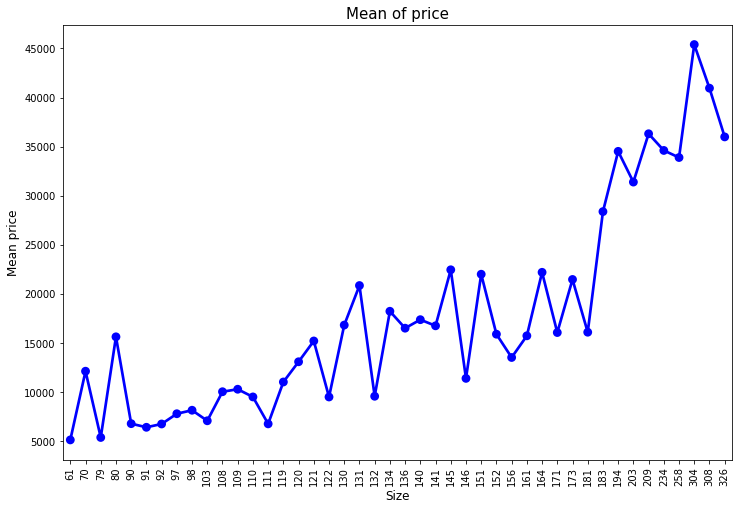

In [30]:
# Mean of price by Enginesize
plt.figure(figsize=(12,8))
grouped_df = df.groupby(["enginesize"])["price"].aggregate("mean").reset_index()
sns.pointplot(grouped_df['enginesize'].values, grouped_df['price'].values, alpha=0.8, color="blue")
plt.ylabel('Mean price', fontsize=12)
plt.xlabel('Size', fontsize=12)
plt.title("Mean of price", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

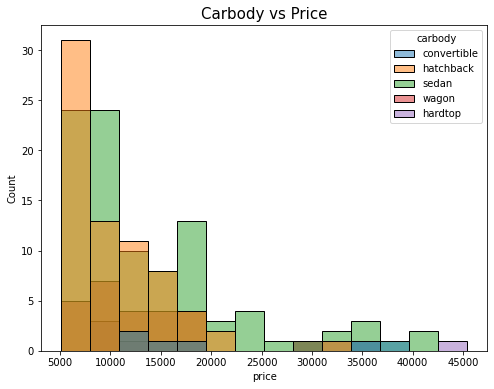

In [31]:
# Price according to carbody
plt.figure(figsize=(8,6))
plt.title("Carbody vs Price", fontsize=15)
sns.histplot(x="price", hue="carbody", data=df)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

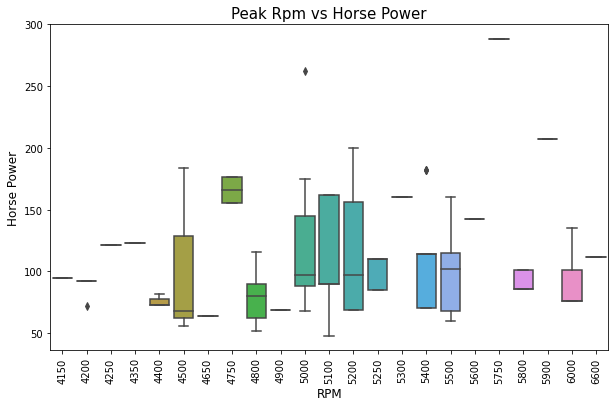

In [32]:
# Graph w.r.t to Peak Rpm and Horse Power
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x=df['peakrpm'],y=df["horsepower"])
plt.ylabel('Horse Power', fontsize=12)
plt.xlabel('RPM', fontsize=12)
plt.title('Peak Rpm vs Horse Power', fontsize=15)
plt.xticks(rotation='vertical')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


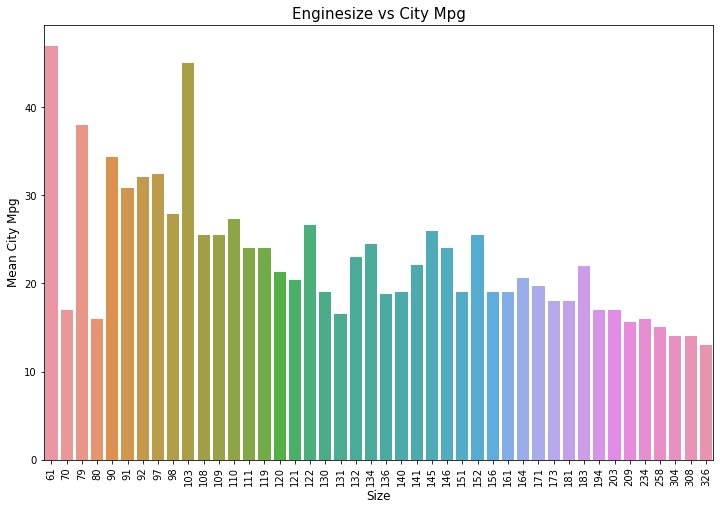

In [33]:
# Graph w.r.t to Enginesize & Mean City Mpg (Miles per gallon)
plt.figure(figsize=(12,8))
grouped_df = df.groupby(["enginesize"])["citympg"].aggregate("mean").reset_index()
sns.barplot(grouped_df['enginesize'].values, grouped_df['citympg'].values)
plt.ylabel('Mean City Mpg', fontsize=12)
plt.xlabel('Size', fontsize=12)
plt.title("Enginesize vs City Mpg", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


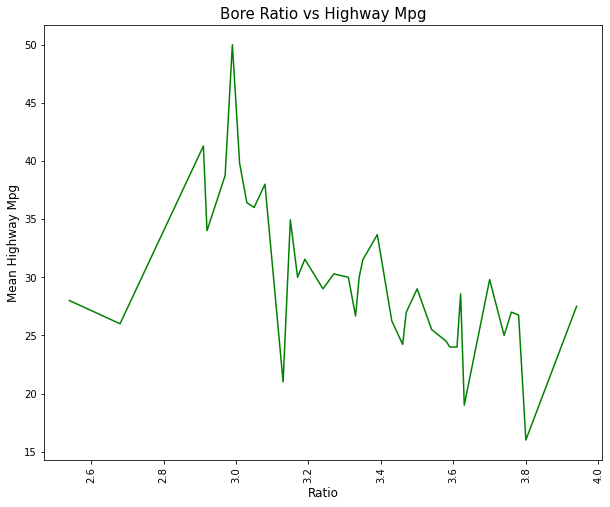

In [34]:
# Graph w.r.t to Bore Ratio & Mean Highway Mpg (Miles per gallon)
plt.figure(figsize=(10,8))
grouped_df = df.groupby(["boreratio"])["highwaympg"].aggregate("mean").reset_index()
sns.lineplot(grouped_df['boreratio'].values, grouped_df['highwaympg'].values, color="green")
plt.ylabel('Mean Highway Mpg', fontsize=12)
plt.xlabel('Ratio', fontsize=12)
plt.title("Bore Ratio vs Highway Mpg", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
# Dashboard to analyze how many cars use gas or diesel
dashboard = df[["CarName", "fueltype", "price"]]
figure = px.sunburst(dashboard, path=["fueltype", "CarName"], 
                     values="price", 
                     width=800, height=800, color_continuous_scale="RdY1Gn", 
                     title="Cars & Fueltype")
figure.show()